In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [14]:
df_synthetic_results = pd.read_csv('results_syntheticData.csv')
%store df_synthetic_results
df_synthetic_results

Stored 'df_synthetic_results' (DataFrame)


,method,ATE,ITE
0,Causal Tree,2.000000,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
1,cforest_mse,NaN,NaN
2,cforest_cmse,2.000000,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
3,cforest_cmse_p=0.5,2.000000,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
4,cforest_cmse_p=0.5_md=3,2.000000,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
5,cforest_ttest,2.000000,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
6,IPW LR,2.000000,NaN
7,Double ML,1.994487,"[1.992640849756571, 1.992640849756571, 1.99264..."
8,Linear Regression,2.000000,NaN
9,S-Learner LR,2.000000,"[1.999999999999998, 1.9999999999999987, 1.9999..."


In [7]:
%store -r df_synthetic_results
df_synthetic_results.to_csv('results_syntheticData.csv', index=False)

In [9]:
df_results = bpi2017_result
%store df_results

Stored 'df_results' (DataFrame)


In [15]:
%store -r df_results
df_results

,method,ATE,ITE,Library,Method Type
0,Linear Regression,0.449046,NaN,DoWhy,Linear Regression
1,Double ML,0.471019,"[0.0, 0.0, 0.0, 0.9730893270729309, 1.24351258...",DoWhy,DML?
2,IPW,0.311352,NaN,DoWhy,IPW
3,IPW Hajek,0.311352,NaN,DoWhy,IPW
4,IPW Stabalized,0.311352,NaN,DoWhy,IPW
5,Propensity Score Matching,-0.179289,NaN,DoWhy,Matching
6,Distance Matching,0.630322,NaN,DoWhy,Matching
7,IPW LR,0.149171,NaN,Causallib,IPW
8,CausalEGM,0.074594,"[-0.484375, 0.0556640625, 0.15234375, 0.203125...",CausalEGM,Deep Learning
9,Causal Tree,0.034357,"[-0.7879656160458453, -0.043494462980468274, 0...",CausalML,Uplift


In [18]:
bpi2017_result = pd.read_csv("df_results_types.csv")
bpi2017_result

,method,ATE,ITE,Library,Method Type
0,Linear Regression,0.449046,NaN,DoWhy,Linear Regression
1,Double ML,0.471019,"[0.0, 0.0, 0.0, 0.9730893270729309, 1.24351258...",DoWhy,DML?
2,IPW,0.311352,NaN,DoWhy,IPW
3,IPW Hajek,0.311352,NaN,DoWhy,IPW
4,IPW Stabalized,0.311352,NaN,DoWhy,IPW
5,Propensity Score Matching,-0.179289,NaN,DoWhy,Matching
6,Distance Matching,0.630322,NaN,DoWhy,Matching
7,IPW LR,0.149171,NaN,Causallib,IPW
8,CausalEGM,0.074594,"[-0.484375, 0.0556640625, 0.15234375, 0.203125...",CausalEGM,Deep Learning
9,Causal Tree,0.034357,"[-0.7879656160458453, -0.043494462980468274, 0...",CausalML,Uplift


In [16]:
bpi2017_result = df_results

In [17]:
bpi2017_result.to_csv('df_results_types.csv', index=False)

## Evaluation Results

In [3]:
df_evaluation_results = pd.read_csv("df_evaluation_results.csv")

In [8]:
df_evaluation_results = pd.DataFrame(columns=['method', 'Random Common Cause ATE', 'Placebo treatment ATE', 'Random Subset ATE', 'Random Feature Replacement ATE', 'Replaced Feature'])

In [4]:
%store df_evaluation_results

Stored 'df_evaluation_results' (DataFrame)


In [5]:
%store -r df_evaluation_results
df_evaluation_results

,method,Random Common Cause ATE,Placebo treatment ATE,Random Subset ATE,Random Feature Replacement ATE,Replaced Feature
0,IPW LR,0.000007,0.000007,-0.000095,0.000007,NumberOfTerms
1,CausalEGM,0.099503,0.147094,0.142708,0.137571,concept:name


In [9]:
df_evaluation_results.to_csv('df_evaluation_results.csv', index=False)

### Plots

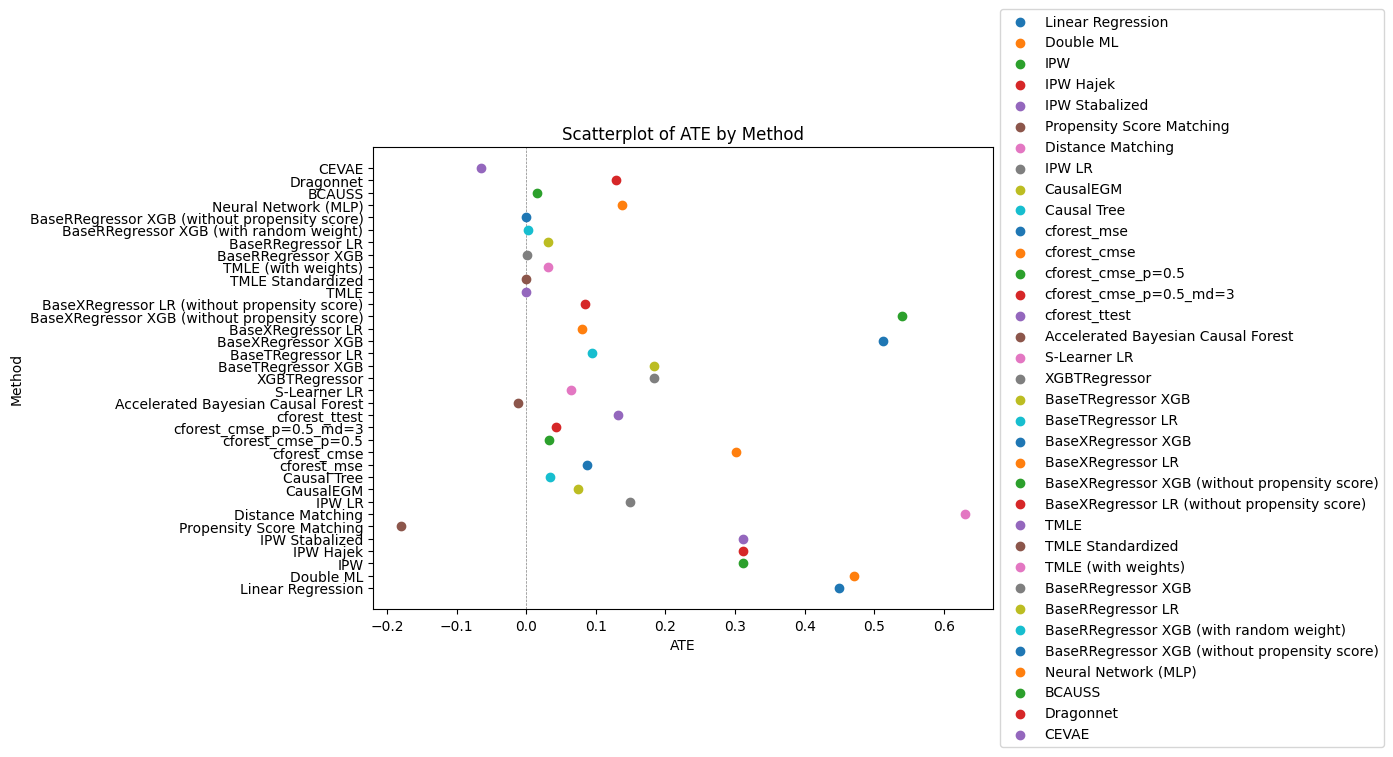

In [19]:
plt.figure(figsize=(8, 6))
# Add a grey line at x=0
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5, zorder=0)

for method in bpi2017_result['method'].unique():
    plt.scatter(bpi2017_result[bpi2017_result['method'] == method]['ATE'], 
                [method] * len(bpi2017_result[bpi2017_result['method'] == method]),
                label=method)

# Add labels and title
plt.xlabel('ATE')
plt.ylabel('Method')
plt.title('Scatterplot of ATE by Method')
# Add legend to the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('scatterplot_ATE.png')

# Show plot
plt.show()

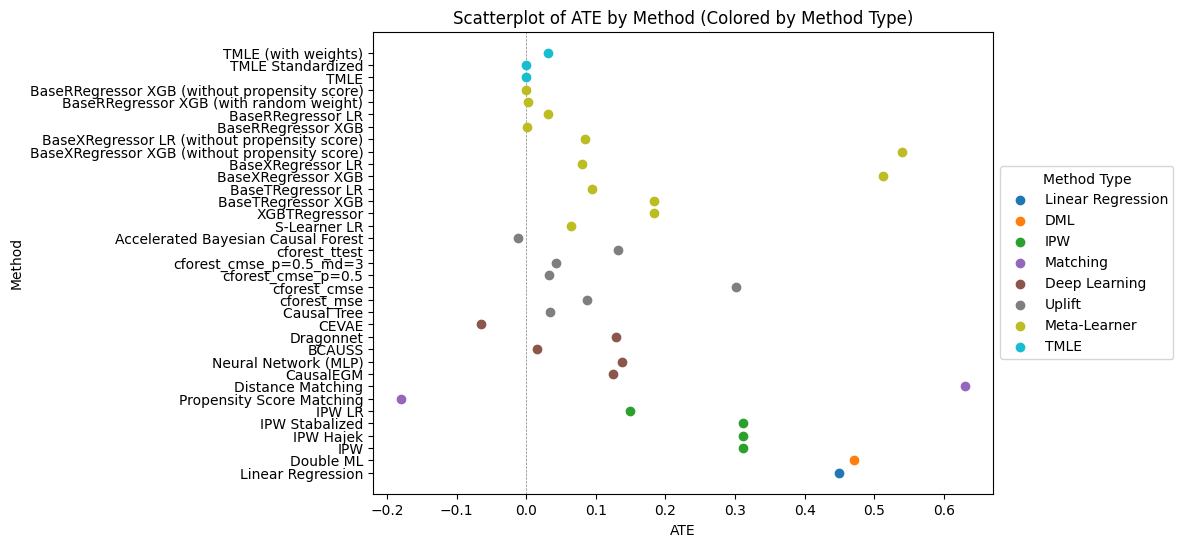

In [17]:
# Get unique method types
unique_method_types = bpi2017_result['Method Type'].unique()

# Generate a larger set of distinct colors for method types
num_colors_needed = len(unique_method_types)
colors = plt.cm.tab10(np.linspace(0, 1, num_colors_needed))

# Scatter plot
plt.figure(figsize=(8, 6))
for i, method_type in enumerate(unique_method_types):
    method_type_data = bpi2017_result[bpi2017_result['Method Type'] == method_type]
    plt.scatter(method_type_data['ATE'], 
                method_type_data['method'],
                label=method_type, color=colors[i])

# Add labels and title
plt.xlabel('ATE')
plt.ylabel('Method')
plt.title('Scatterplot of ATE by Method (Colored by Method Type)')

# Add a grey line at x=0
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5, zorder=0)

# Add legend to the right of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Method Type')

plt.savefig('scatterplot_ATE_Method.png')
# Show plot
plt.show()

In [20]:
import pandas as pd
import numpy as np

# Step 1: Get indices where column "ITE" is not empty or NaN
non_empty_indices = bpi2017_result[bpi2017_result['ITE'].notna()].index

# Step 2: Check whether values at these indices are string or array
for index in non_empty_indices:
    ite = bpi2017_result.at[index, 'ITE']
    if isinstance(ite, str):
        values = [float(x) for x in re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', ite)]
    else:
        values = ite
    exec(f'minimum{index}, first_quartile{index}, median{index}, third_quartile{index}, maximum{index}, iqr{index}, upper_bound{index}, lower_bound{index} = values')
print(index)

33


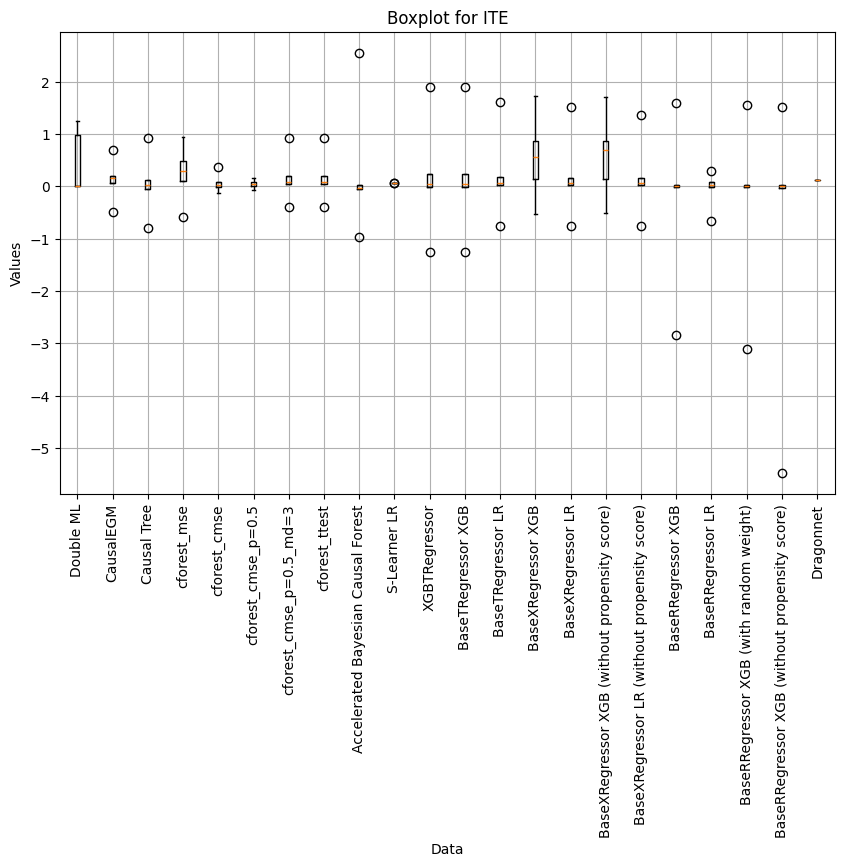

In [21]:
plt.figure(figsize=(10, 6))
y = 1
for i in non_empty_indices:
    plt.boxplot([
            globals()[f'minimum{i}'],
            globals()[f'first_quartile{i}'],
            globals()[f'median{i}'],
            globals()[f'third_quartile{i}'],
            globals()[f'maximum{i}']
        ], positions=[y], labels=[bpi2017_result.at[i, 'method']])
    y += 1
plt.title('Boxplot for ITE')
plt.ylabel('Values')
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('boxplot.png')
plt.show()

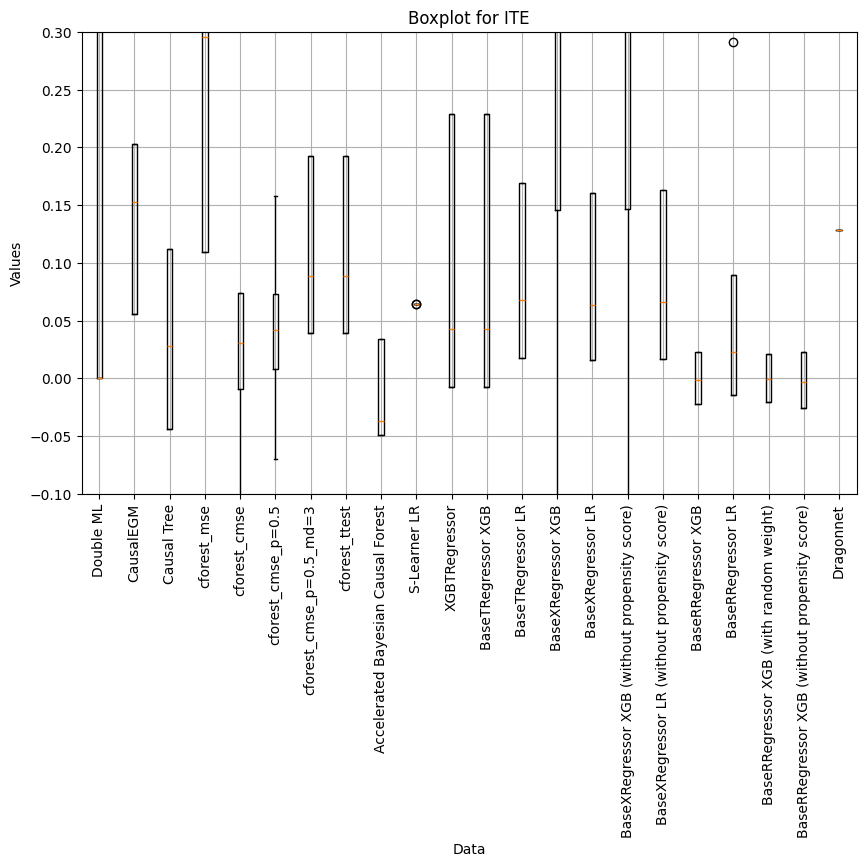

In [22]:
plt.figure(figsize=(10, 6))
y = 1
for i in non_empty_indices:
    plt.boxplot([
            globals()[f'minimum{i}'],
            globals()[f'first_quartile{i}'],
            globals()[f'median{i}'],
            globals()[f'third_quartile{i}'],
            globals()[f'maximum{i}']
        ], positions=[y], labels=[bpi2017_result.at[i, 'method']])
    y += 1
plt.title('Boxplot for ITE')
plt.ylabel('Values')
plt.xlabel('Data')
plt.xticks(rotation=90)
plt.ylim(-0.1, 0.3)  # Limiting the y-axis range
plt.grid(True)
plt.savefig('boxplot_NearZero.png')
plt.show()